In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset1.csv
/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv


# Reading Data

In [2]:
df = pd.read_csv('/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv')
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
df.columns.tolist()

['job_id',
 'job_title',
 'salary_usd',
 'salary_currency',
 'experience_level',
 'employment_type',
 'company_location',
 'company_size',
 'employee_residence',
 'remote_ratio',
 'required_skills',
 'education_required',
 'years_experience',
 'industry',
 'posting_date',
 'application_deadline',
 'job_description_length',
 'benefits_score',
 'company_name']

In [5]:
df.shape

(15000, 19)

In [6]:
df.head(n=10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [7]:
df.tail(n=10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
14990,AI14991,ML Ops Engineer,100684,USD,MI,CT,Australia,L,Finland,100,"MLOps, AWS, Computer Vision, Azure",Master,4,Automotive,2024-10-03,2024-12-03,1989,9.6,Neural Networks Co
14991,AI14992,Robotics Engineer,97480,USD,MI,FT,United States,M,United States,50,"R, GCP, AWS, Tableau, TensorFlow",Master,4,Energy,2024-09-18,2024-11-06,1196,7.9,Future Systems
14992,AI14993,Autonomous Systems Engineer,200047,USD,SE,PT,Denmark,L,Denmark,50,"Computer Vision, Data Visualization, R, Hadoop...",Associate,9,Telecommunications,2024-10-28,2024-11-15,1986,7.6,Neural Networks Co
14993,AI14994,Autonomous Systems Engineer,130671,USD,EX,CT,South Korea,M,South Korea,0,"Computer Vision, Deep Learning, AWS",PhD,13,Retail,2024-07-14,2024-09-15,1167,7.1,Quantum Computing Inc
14994,AI14995,ML Ops Engineer,132854,EUR,EX,CT,France,M,Ireland,0,"Data Visualization, Spark, Python",PhD,14,Media,2024-10-11,2024-12-03,1222,7.9,Advanced Robotics
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations


In [8]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [9]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [10]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [11]:
df['salary_usd'].median()

99705.0

In [12]:
df.groupby("industry").mean(numeric_only = True)

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
industry,,,,,
Automotive,113987.241176,48.921569,6.086275,1496.934314,7.421078
Consulting,117602.142157,49.803922,6.521569,1505.184314,7.441961
Education,116026.803347,48.692469,6.341004,1486.609833,7.471444
Energy,115188.436475,48.668033,6.560451,1533.036885,7.425717
Finance,115323.398374,50.813008,6.150407,1520.953252,7.524695
Gaming,112979.574974,49.431231,6.071355,1550.074457,7.466184
Government,115694.321643,49.498998,6.191383,1474.071142,7.569038
Healthcare,114433.883651,49.297894,6.282849,1496.016048,7.517854
Manufacturing,116162.888773,49.324324,6.335759,1490.849272,7.471102


In [13]:
df.groupby('company_location')['salary_usd'].mean()

company_location
Australia         118238.887978
Austria            85174.530719
Canada            114253.310793
China              84899.003932
Denmark           165652.249357
Finland            88726.242838
France            114411.361508
Germany           121810.143735
India              84236.051724
Ireland            86061.044000
Israel             86989.633822
Japan              86861.110505
Netherlands       126750.451436
Norway            159490.533981
Singapore         128004.035340
South Korea        85842.703601
Sweden            123559.753989
Switzerland       170639.085791
United Kingdom    128720.186557
United States     146833.045580
Name: salary_usd, dtype: float64

# Data Exploration 

# Top Industries by Global AI Sector

*Below are data visualisations highlighting trends in global ai sector when we segment by industry. The charts demonstrate there is a diverse range of industries benefitting from AI specialised roles, as well as there being a plethora of opportunities available in each respective job market.*

In [14]:
import matplotlib.pyplot as plt

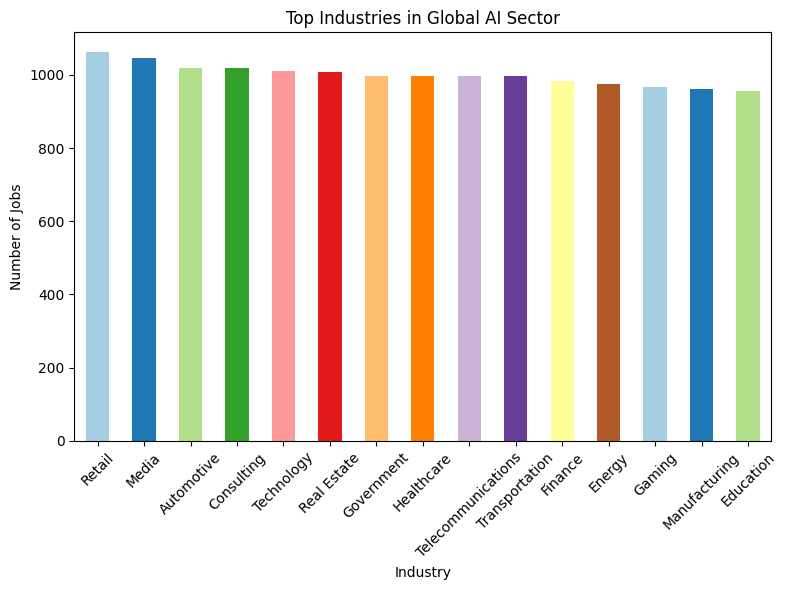

In [15]:
# Bar Chart

plt.figure(figsize=(8,6))

df['industry'].value_counts().plot(kind='bar', color=plt.cm.Paired.colors)

plt.title('Top Industries in Global AI Sector')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

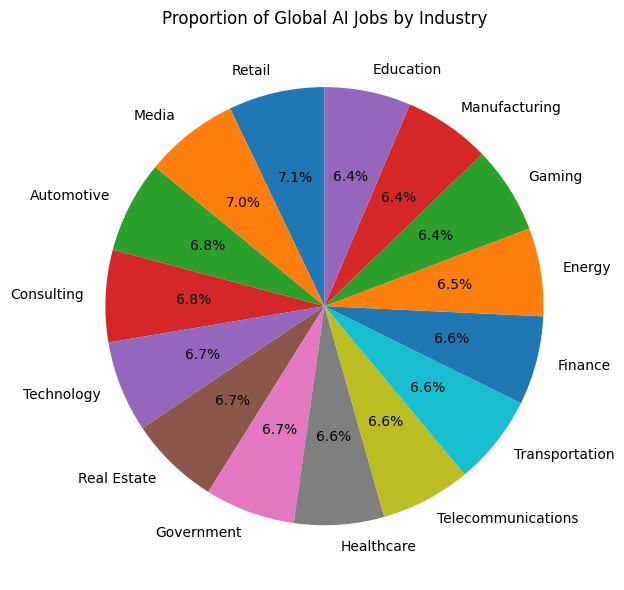

In [16]:
# Pie Chart

plt.figure(figsize=(8, 6))
industry_size_counts = df['industry'].value_counts()
plt.pie(
    industry_size_counts,
    labels=industry_size_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab10.colors
)
plt.title('Proportion of Global AI Jobs by Industry')
plt.tight_layout()
plt.show()

# Employment Opportunities in Global AI industry

*The global AI industry is already enormous and has showed no signs of halting growth. However, this behemoth of an industry encompasses people at all stages in their career, with different employment circumstances. The visuals below shows the different types of employment operating in this field and how employees' experience levels are distributed.*

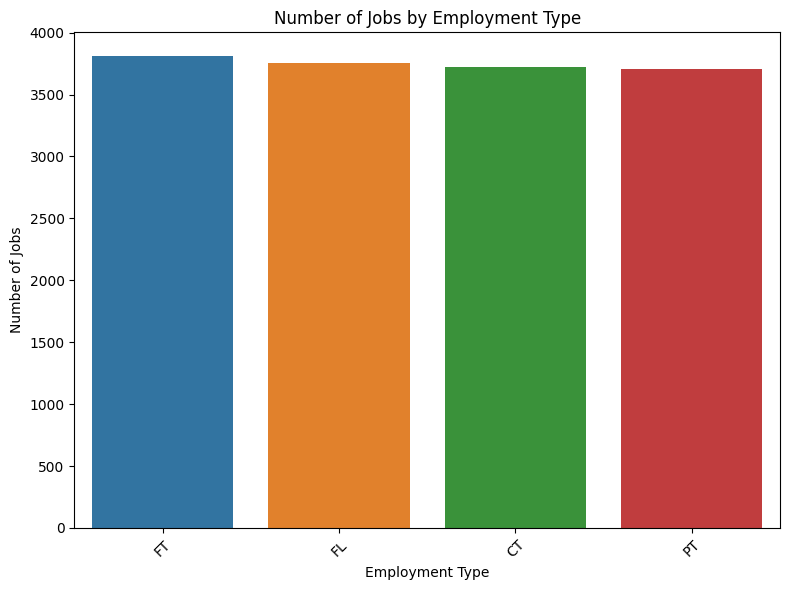

In [17]:
# Bar chart plotted with seaborn 

import seaborn as sbr

plt.figure(figsize=(8,6))

employment_type_counts = df['employment_type'].value_counts()

sbr.barplot(
    x=employment_type_counts.index, # FT, PT etc
    y=employment_type_counts.values # row values
)

plt.title('Number of Jobs by Employment Type')
plt.xlabel('Employment Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

## Key

#### FT = Full Time, FL = Freelance, CT = Contract, PT = Part Time

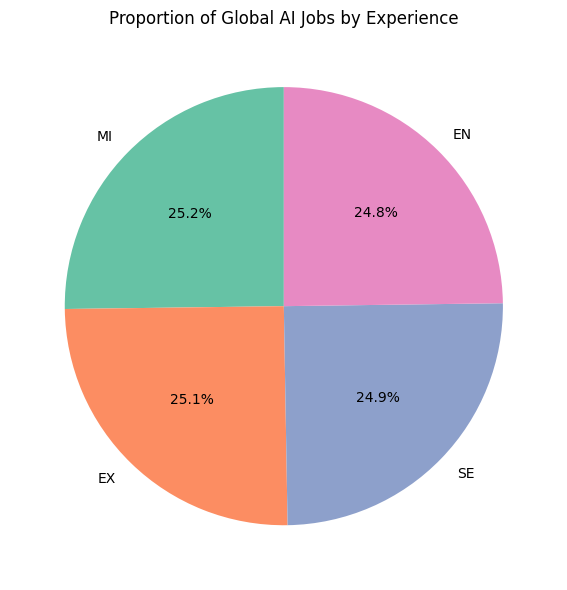

In [18]:
plt.figure(figsize=(8, 6))
experience_level_counts = df['experience_level'].value_counts()
plt.pie(
    experience_level_counts,
    labels=experience_level_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sbr.color_palette("Set2")
)
plt.title('Proportion of Global AI Jobs by Experience')
plt.tight_layout()
plt.show()

## Key

#### EN (Entry), MI (Mid), SE (Senior), EX (Executive)

# Regional Impacts


*The AI sector is influenced in many ways by location. Location of AI focused enterprises directly affects their funding, business opportunities, acces to skilled workforce, economies of scale and many more factors. The visualisations touch upon the variances in wages by, as well as differences in scales of companies.*

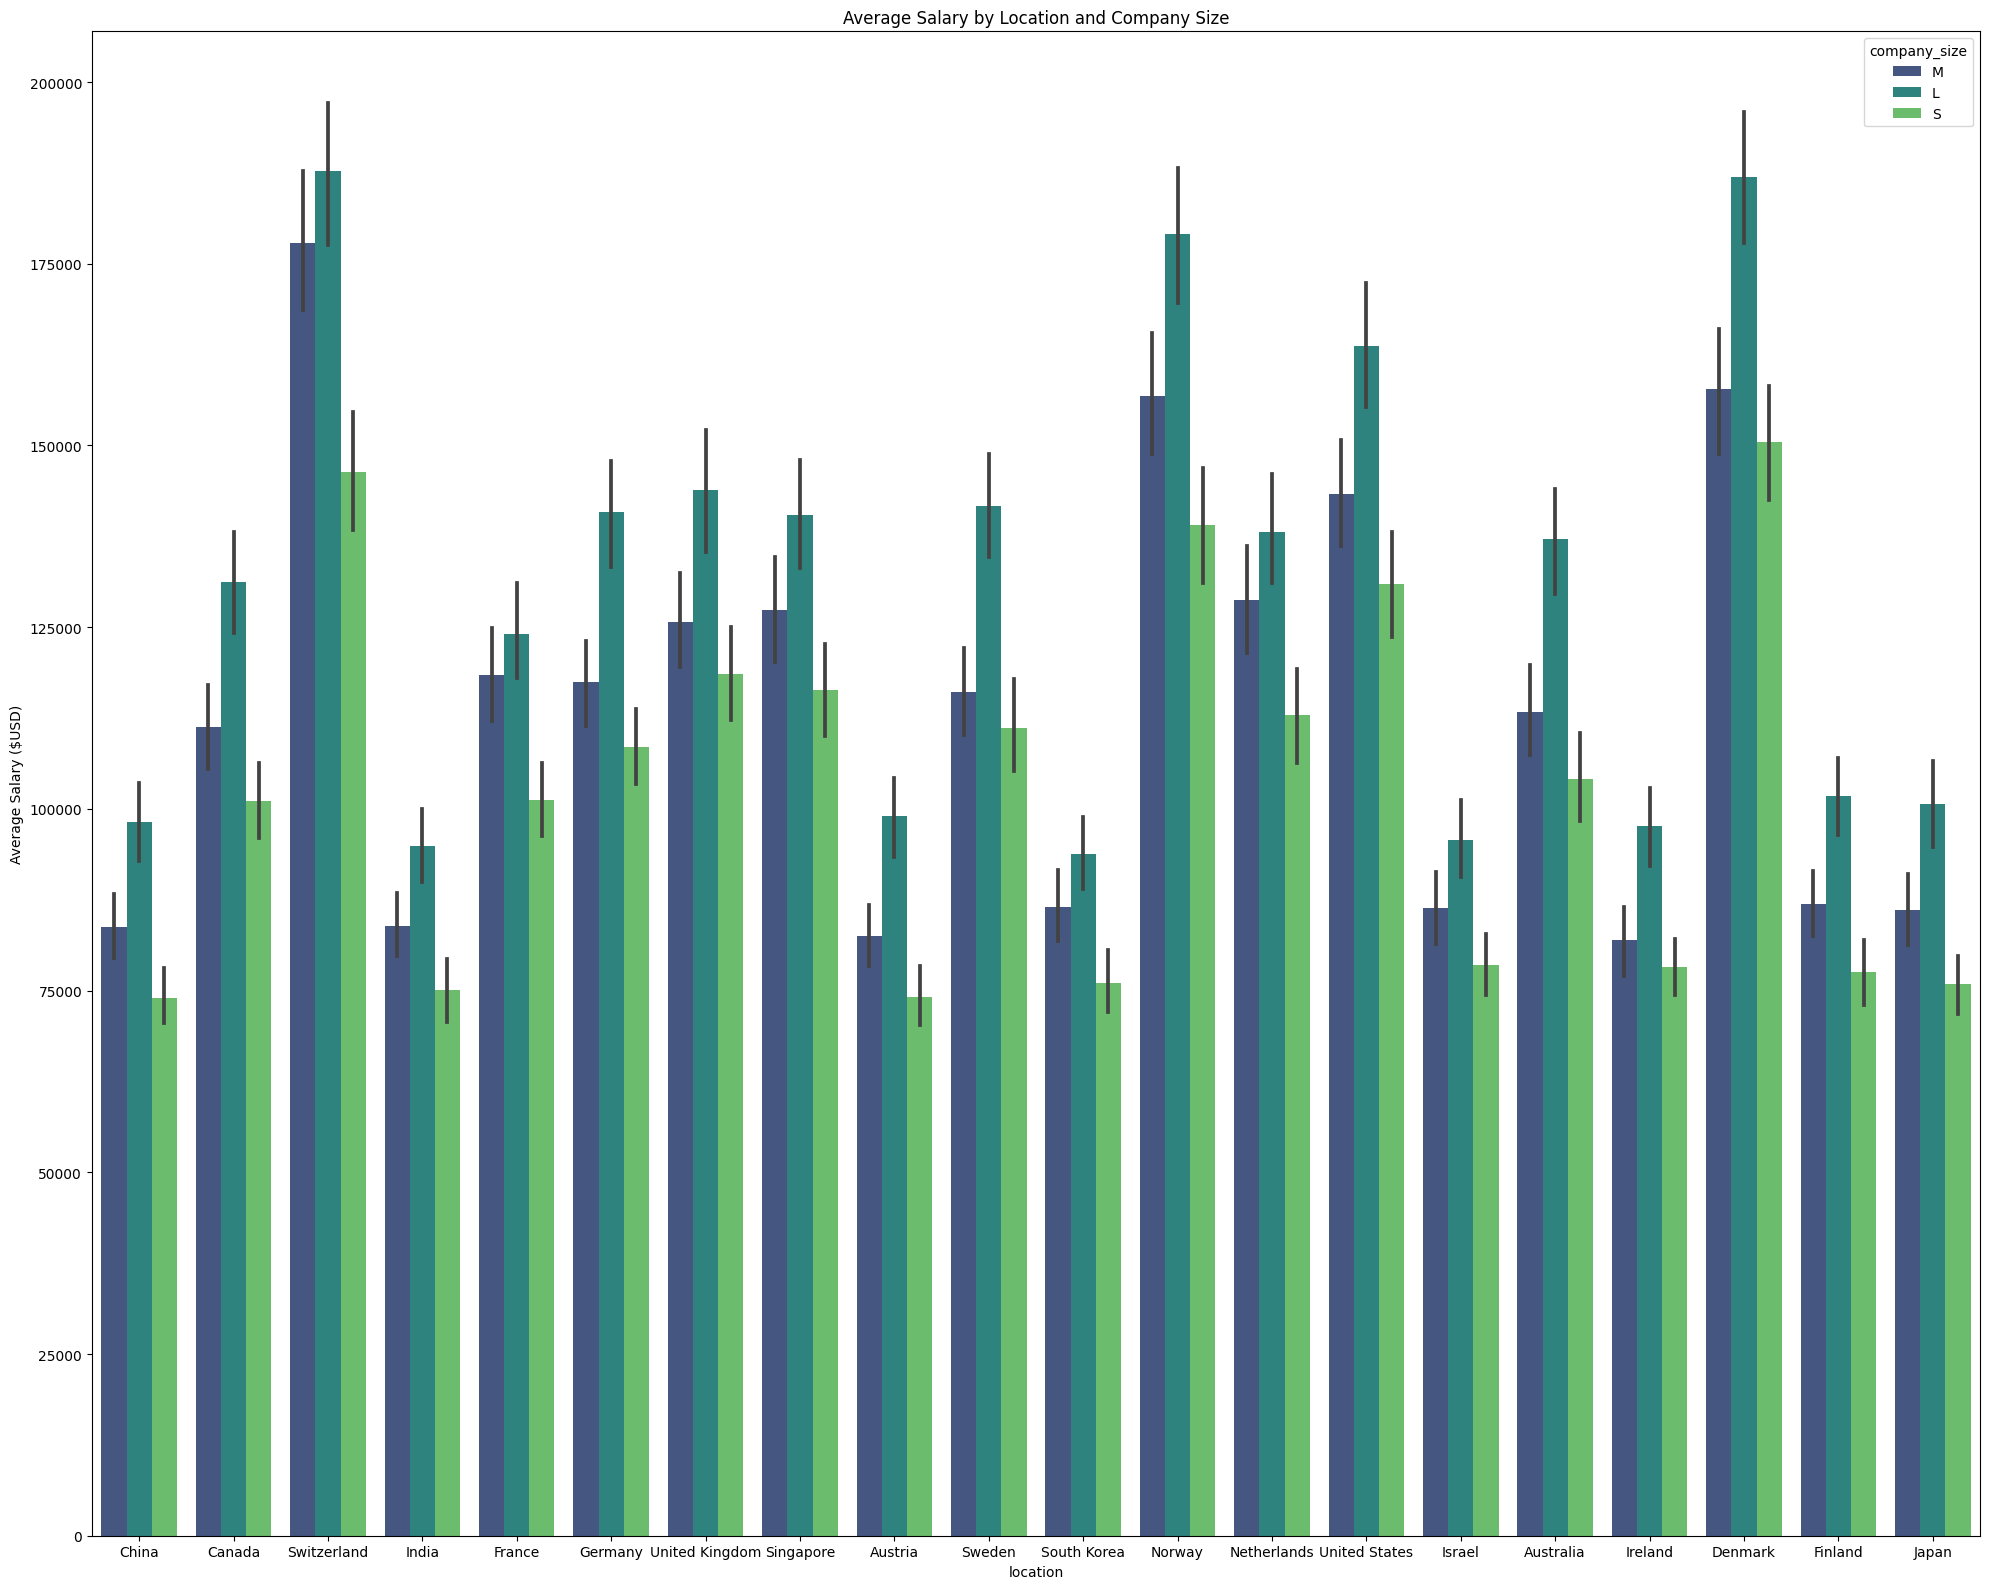

In [19]:
# Variation of Average Salary by Scale of Company

plt.figure(figsize=(20, 16))

sbr.barplot(data=df ,x="company_location" ,y="salary_usd" ,hue="company_size", palette="viridis")

plt.title("Average Salary by Location and Company Size")
plt.xlabel("location")
plt.ylabel("Average Salary ($USD)")
plt.legend(title="company_size")
plt.tight_layout()
plt.show()


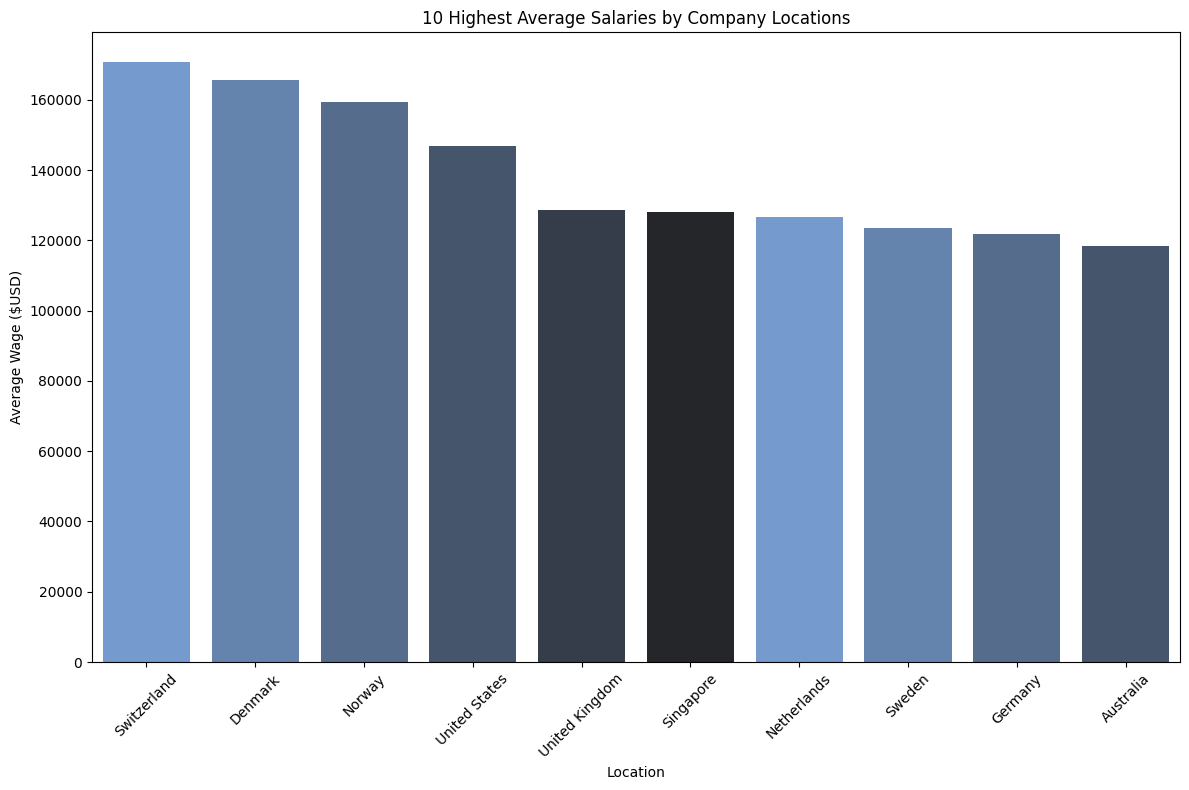

In [20]:
plt.figure(figsize=(12,8))

top_10_average_wages_region = df.groupby("company_location")['salary_usd'].mean().sort_values(ascending=False).head(10)

sbr.barplot(
    x=top_10_average_wages_region.index, 
    y=top_10_average_wages_region.values, 
    palette=sbr.dark_palette("#69d", reverse=True)
)

plt.title('10 Highest Average Salaries by Company Locations')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('Average Wage ($USD)')
plt.tight_layout()
plt.show()

# Importance of Education

*This dataset incorporates 4 data types of the 'education_required' column - "Bachelor, Associate, Master and PHD" academic credentials. Typically, we perceive in our society that those who possess optimal academics tend to enjoy lucrative and reputable careers. The visuals below explore if this paradigm exists in the burgeoning global AI sector today.*

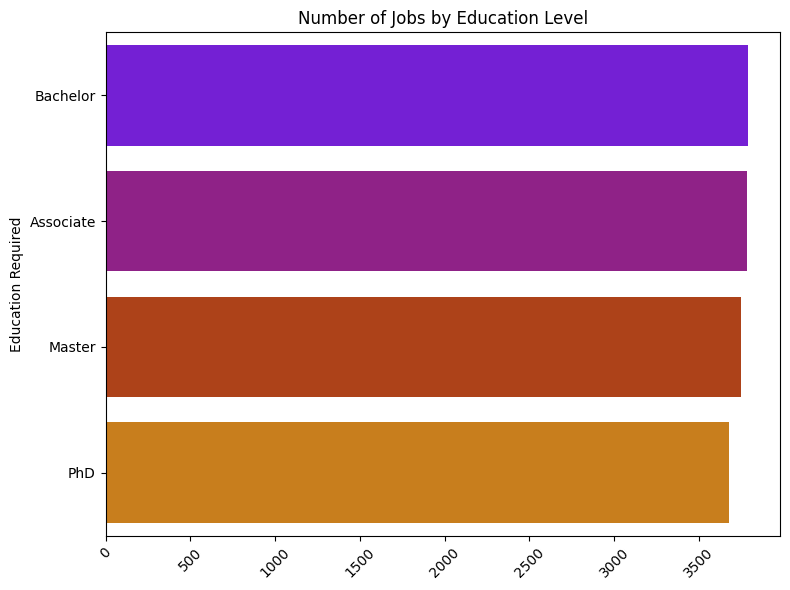

In [21]:
plt.figure(figsize=(8,6))

edu_counts = df['education_required'].value_counts()

sbr.barplot(x=edu_counts.values,
            y=edu_counts.index,
            palette="gnuplot"
           )

plt.title('Number of Jobs by Education Level')
plt.ylabel('Education Required')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

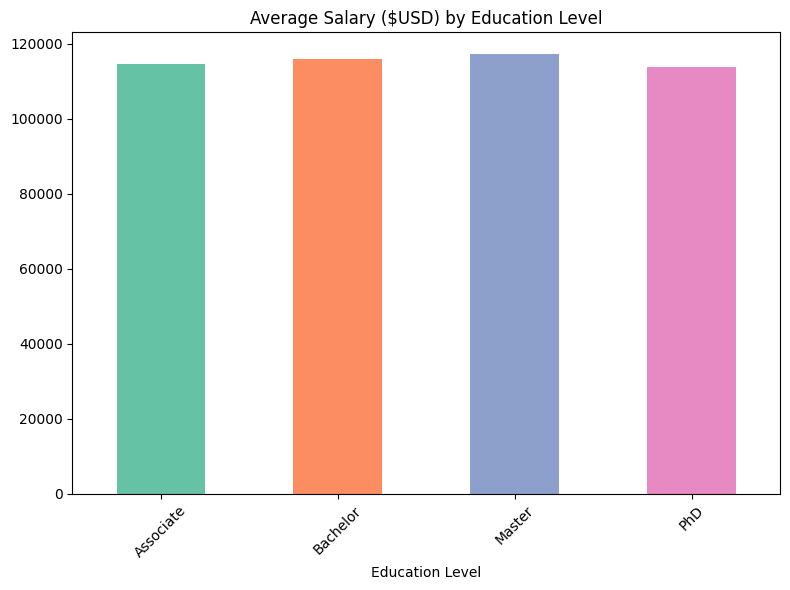

In [22]:
plt.figure(figsize=(8,6))

df.groupby("education_required")['salary_usd'].mean().plot(
    kind='bar', color=plt.cm.Set2.colors
)

plt.title('Average Salary ($USD) by Education Level')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

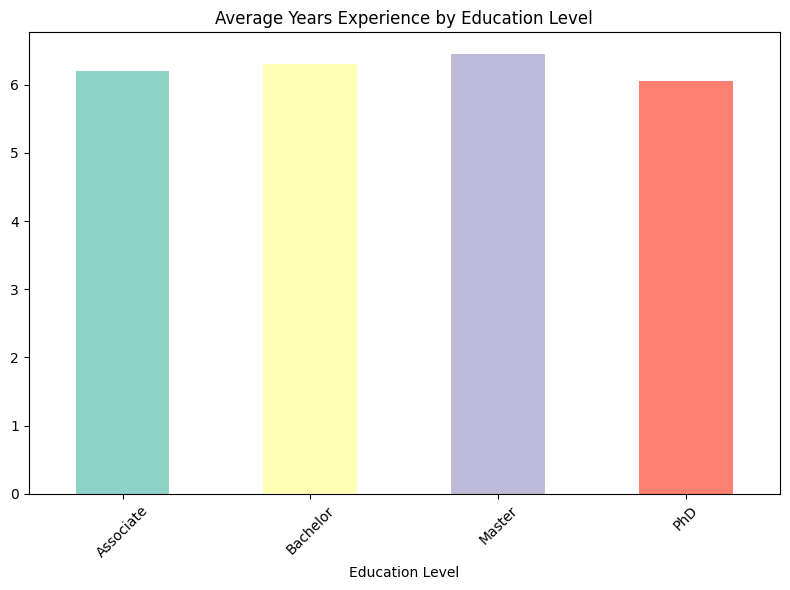

In [23]:
plt.figure(figsize=(8,6))

df.groupby("education_required")['years_experience'].mean().plot(
    kind='bar', color=plt.cm.Set3.colors
)

plt.title('Average Years Experience by Education Level')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df["skills_list"] = df["required_skills"].apply(lambda x: [s.strip() for s in x.split(",")])
all_skills = [skill for sub in df["skills_list"] for skill in sub]
skills_counts = pd.Series(all_skills).value_counts()

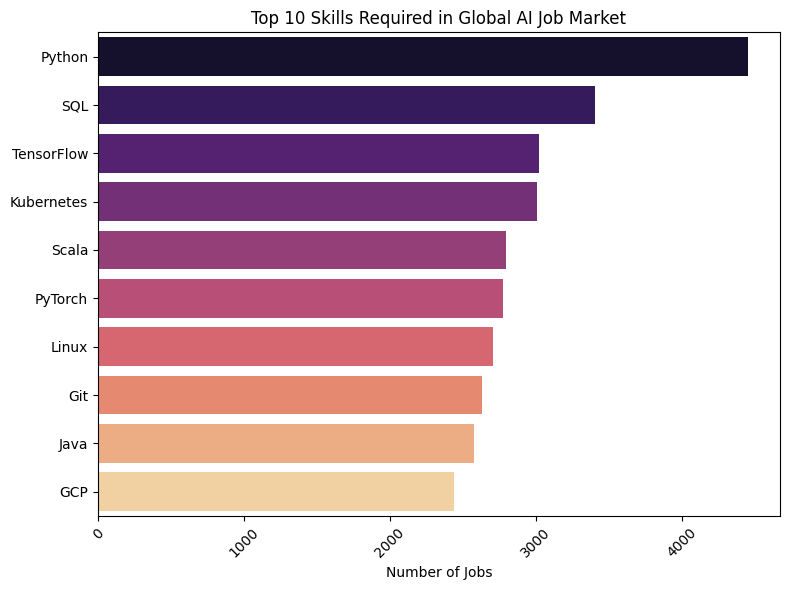

In [25]:
plt.figure(figsize=(8,6))

top_skills = skills_counts.head(10)

sbr.barplot(x=top_skills.values,
            y=top_skills.index,
            palette="magma"
           )

plt.title('Top 10 Skills Required in Global AI Job Market')
plt.xlabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time in the Market

*Experience will continue to play a pivotal role in this relatively nascent industry. The AI sector has benefitted from radical newcomers, yet its augmentation and sustainablity will be safeguarded by those who have spent decades developing skills and wisdom to utilise and develop Artificial Intelligence to provide society with solutions and new frontiers. Below, we explore how an individual's work life and circumstances change with consistent years in the field.*

## Key 

*EN = Entry, EX = Executive, MI = Midlevel, SE = Senior*

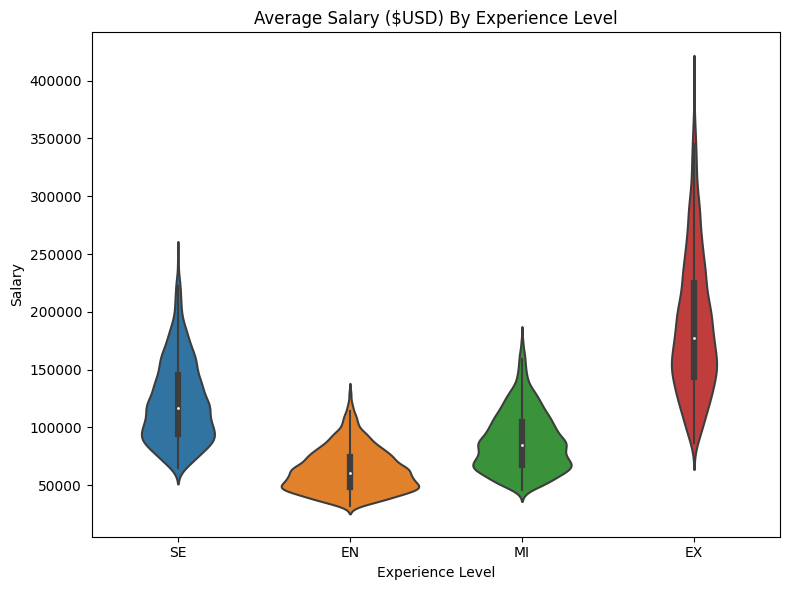

In [26]:
plt.figure(figsize=(8,6))

sbr.violinplot(x="experience_level", y="salary_usd", data=df)

plt.title("Average Salary ($USD) By Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

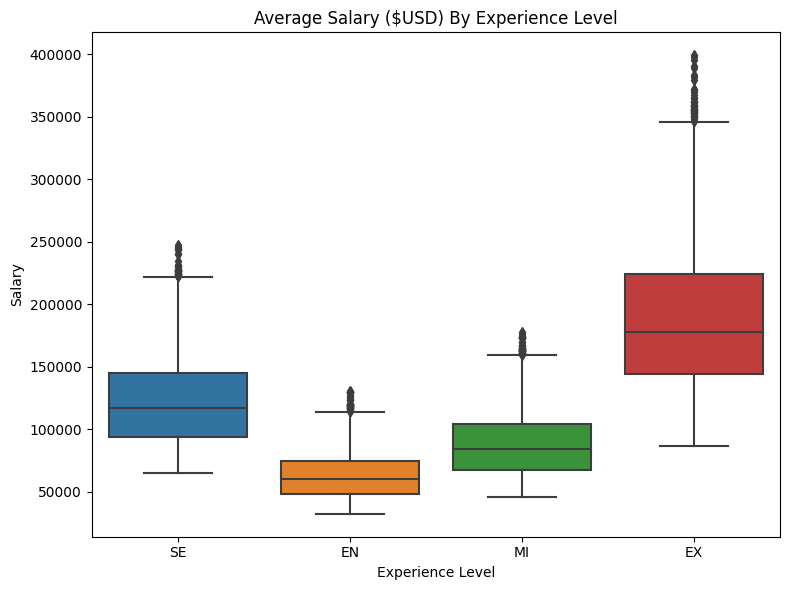

In [27]:
plt.figure(figsize=(8,6))

sbr.boxplot(x="experience_level", y="salary_usd", data=df)

plt.title("Average Salary ($USD) By Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

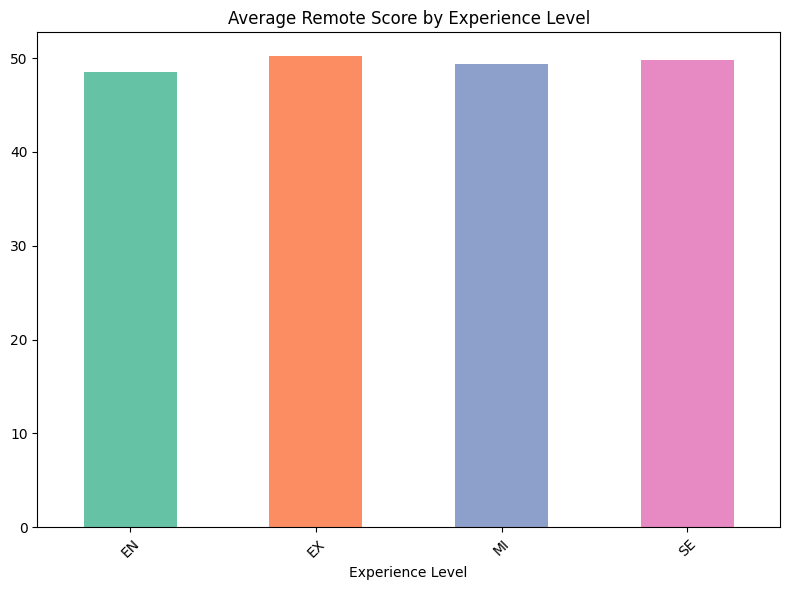

In [28]:
plt.figure(figsize=(8,6))

df.groupby("experience_level")['remote_ratio'].mean().plot(
    kind='bar', color=plt.cm.Set2.colors
)

plt.title('Average Remote Score by Experience Level')
plt.xlabel('Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *Note: Remote Ratio metrics are 0 (No Remote), 50 (Hybrid), 100 (Fully Remote)*

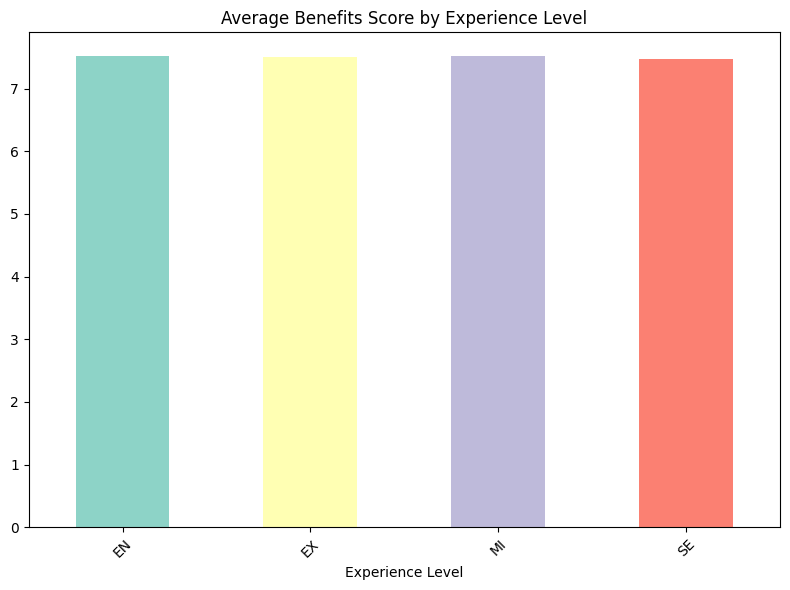

In [29]:
plt.figure(figsize=(8,6))

df.groupby("experience_level")['benefits_score'].mean().plot(
    kind='bar', color=plt.cm.Set3.colors
)

plt.title('Average Benefits Score by Experience Level')
plt.xlabel('Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

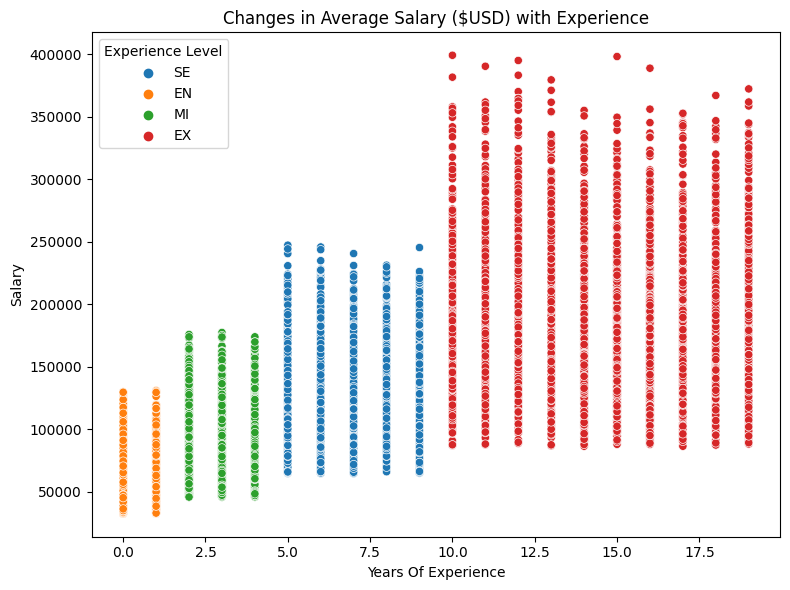

In [30]:
plt.figure(figsize=(8,6))

sbr.scatterplot(
    x="years_experience", y="salary_usd", 
    data=df,
    hue="experience_level"
)

plt.title("Changes in Average Salary ($USD) with Experience")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

# Distribution of Salary



- The majority of the salaries are clustered in the 50-100K range.


- As evidenced by the right skewed nature of this plot, the frequency of higher paying roles dramatically decreases, especially past the 100K mark and through the 200k threshold.

- This highlights that most roles within the global AI industry pay moderately well, with a solid probability of making great wages when progressing to higher level roles.

  
- However, the opportunities present to earn extreme levels of wealth are much less common and reserved only for the largest scale entities.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


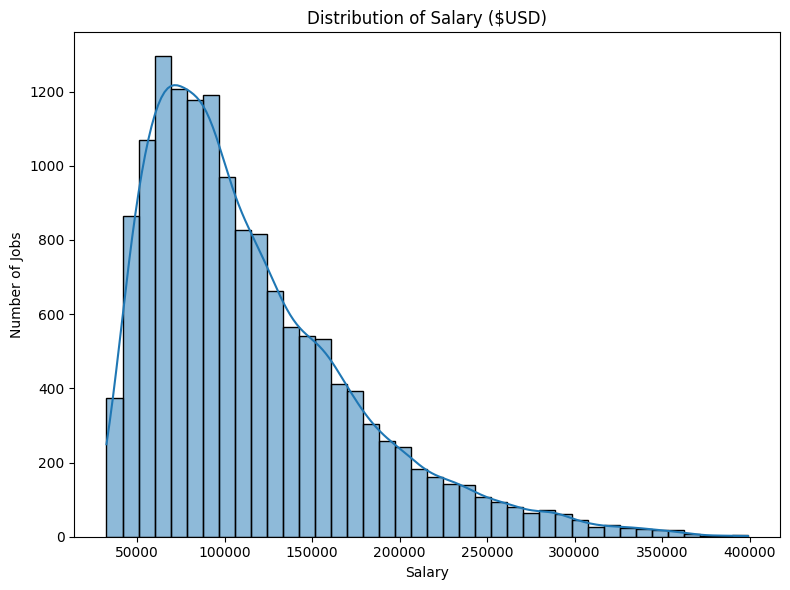

In [31]:
plt.figure(figsize=(8,6))

sbr.histplot( 
    data=df["salary_usd"],
    bins=40,
    kde=True
)

plt.title("Distribution of Salary ($USD)")
plt.xlabel("Salary")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()